# Week 17, Lecture 01 CodeAlong
- Coefficients & Feature Importance

## Lesson Objectives

- By the end of this lesson, students will be able to:
    - Extract feature names from sklearn v1.1 objects
    - Extract and visualize coefficients
    - Save models to a joblib file


### Life Expectancy

> Task Inspired by: https://medium.com/@shanzehhaji/using-a-linear-regression-model-to-predict-life-expectancy-de3aef66ac21

- Kaggle Dataset on Life Expectancy:
    - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
## Importing Custom Functions
import sys,os
sys.path.append(os.path.abspath("../"))
%load_ext autoreload
%autoreload 2
from CODE import data_enrichment as de

In [3]:
import pandas as pd
df = pd.read_csv("../Data/Life Expectancy Data.csv")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [4]:
# clean extra spaces
df.columns = df.columns.str.strip()
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
pd.set_option('display.max_columns',0)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## EDA

In [6]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

<AxesSubplot: >

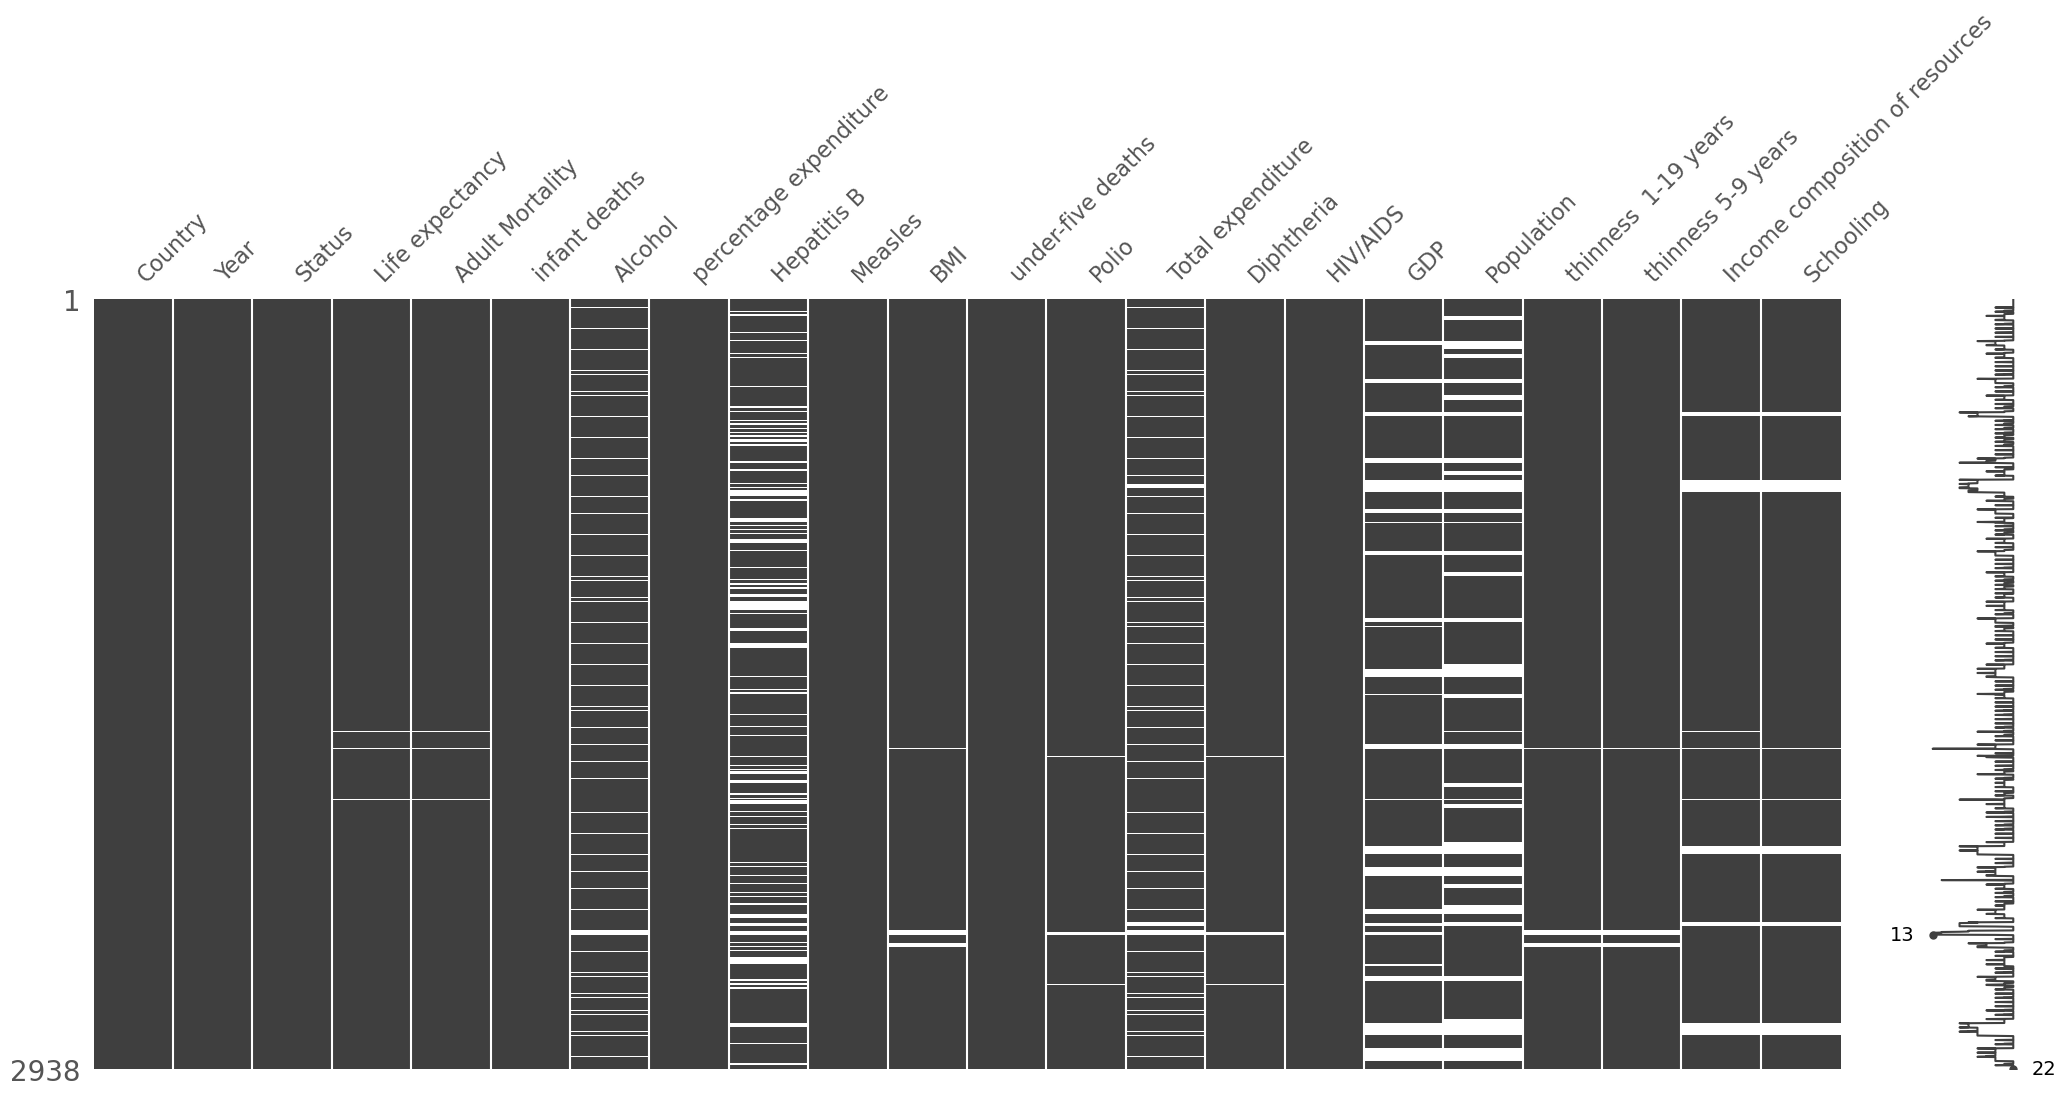

In [7]:
miss.matrix(df)

> Can't have null values for the target!

In [8]:
# drop null values ONLY FROM TARGET
df = df.dropna(subset=['Life expectancy'])

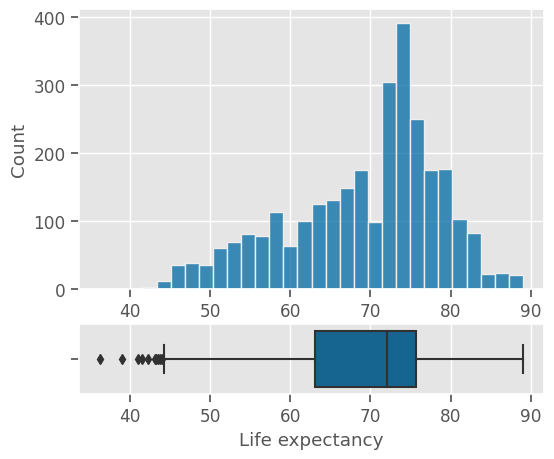

In [9]:
target = 'Life expectancy'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=df, x=target,ax=axes[0])
sns.boxplot(data=df, x=target, ax=axes[1]);

## Preprocessing (with Sklearn v1.1+)

In [10]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


In [11]:
# ### Train Test Split
## Make x and y variables
target = "Life expectancy"
drop_feats = []

y = df[target].copy()
X = df.drop(columns=[target, *drop_feats]).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head(3)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2414,South Sudan,2010,Developing,359.0,27,NaN,0.000000,NaN,0,NaN,41,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
1576,Malawi,2009,Developing,491.0,36,1.16,7.915071,93.0,21,17.3,56,93.0,1.18,93.0,14.9,42.737966,1471462.0,6.9,6.8,0.415,9.9
2559,Tajikistan,2009,Developing,174.0,10,0.30,35.716138,93.0,0,35.9,12,93.0,5.93,93.0,0.2,666.345857,7472819.0,3.7,3.8,0.601,11.1


In [12]:
## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [13]:
## Make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [14]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001DA14ECAF40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001DA14ECA4F0>)])

### Make X_train_df and X_test_df, dataframe verisons of processed X_train/X_test.

In [15]:
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,pipeline-1__Year,pipeline-1__Adult Mortality,pipeline-1__infant deaths,pipeline-1__Alcohol,pipeline-1__percentage expenditure,pipeline-1__Hepatitis B,pipeline-1__Measles,pipeline-1__BMI,pipeline-1__under-five deaths,pipeline-1__Polio,pipeline-1__Total expenditure,pipeline-1__Diphtheria,pipeline-1__HIV/AIDS,pipeline-1__GDP,pipeline-1__Population,pipeline-1__thinness 1-19 years,pipeline-1__thinness 5-9 years,pipeline-1__Income composition of resources,pipeline-1__Schooling,pipeline-2__Country_Afghanistan,pipeline-2__Country_Albania,pipeline-2__Country_Algeria,pipeline-2__Country_Angola,pipeline-2__Country_Antigua and Barbuda,pipeline-2__Country_Argentina,pipeline-2__Country_Armenia,pipeline-2__Country_Australia,pipeline-2__Country_Austria,pipeline-2__Country_Azerbaijan,pipeline-2__Country_Bahamas,pipeline-2__Country_Bahrain,pipeline-2__Country_Bangladesh,pipeline-2__Country_Barbados,pipeline-2__Country_Belarus,pipeline-2__Country_Belgium,pipeline-2__Country_Belize,pipeline-2__Country_Benin,pipeline-2__Country_Bhutan,pipeline-2__Country_Bolivia (Plurinational State of),pipeline-2__Country_Bosnia and Herzegovina,...,pipeline-2__Country_Slovakia,pipeline-2__Country_Slovenia,pipeline-2__Country_Solomon Islands,pipeline-2__Country_Somalia,pipeline-2__Country_South Africa,pipeline-2__Country_South Sudan,pipeline-2__Country_Spain,pipeline-2__Country_Sri Lanka,pipeline-2__Country_Sudan,pipeline-2__Country_Suriname,pipeline-2__Country_Swaziland,pipeline-2__Country_Sweden,pipeline-2__Country_Switzerland,pipeline-2__Country_Syrian Arab Republic,pipeline-2__Country_Tajikistan,pipeline-2__Country_Thailand,pipeline-2__Country_The former Yugoslav republic of Macedonia,pipeline-2__Country_Timor-Leste,pipeline-2__Country_Togo,pipeline-2__Country_Tonga,pipeline-2__Country_Trinidad and Tobago,pipeline-2__Country_Tunisia,pipeline-2__Country_Turkey,pipeline-2__Country_Turkmenistan,pipeline-2__Country_Uganda,pipeline-2__Country_Ukraine,pipeline-2__Country_United Arab Emirates,pipeline-2__Country_United Kingdom of Great Britain and Northern Ireland,pipeline-2__Country_United Republic of Tanzania,pipeline-2__Country_United States of America,pipeline-2__Country_Uruguay,pipeline-2__Country_Uzbekistan,pipeline-2__Country_Vanuatu,pipeline-2__Country_Venezuela (Bolivarian Republic of),pipeline-2__Country_Viet Nam,pipeline-2__Country_Yemen,pipeline-2__Country_Zambia,pipeline-2__Country_Zimbabwe,pipeline-2__Status_Developed,pipeline-2__Status_Developing
2414,2010.0,359.0,27.0,4.580078,0.000000,81.438929,0.0,38.113041,41.0,82.490834,5.931982,82.451879,4.0,1562.239346,1.671920e+05,4.811567,4.819493,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1576,2009.0,491.0,36.0,1.160000,7.915071,93.000000,21.0,17.300000,56.0,93.000000,1.180000,93.000000,14.9,42.737966,1.471462e+06,6.900000,6.800000,0.415,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2559,2009.0,174.0,10.0,0.300000,35.716138,93.000000,0.0,35.900000,12.0,93.000000,5.930000,93.000000,0.2,666.345857,7.472819e+06,3.700000,3.800000,0.601,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1524,2013.0,178.0,0.0,15.040000,1968.816817,93.000000,35.0,61.400000,0.0,93.000000,6.590000,93.000000,0.1,15712.823760,2.957689e+06,2.700000,2.700000,0.834,16.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

> #### Q: What's up with the feature names? What are we seeing?

### Get Features Names + Verbose Feature Names Out

In [16]:
## make the preprocessing column transformer WITH CORRECT ARGS!
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,...,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
2414,2010.0,359.0,27.0,4.580078,0.000000,81.438929,0.0,38.113041,41.0,82.490834,5.931982,82.451879,4.0,1562.239346,1.671920e+05,4.811567,4.819493,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1576,2009.0,491.0,36.0,1.160000,7.915071,93.000000,21.0,17.300000,56.0,93.000000,1.180000,93.000000,14.9,42.737966,1.471462e+06,6.900000,6.800000,0.415,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2559,2009.0,174.0,10.0,0.300000,35.716138,93.000000,0.0,35.900000,12.0,93.000000,5.930000,93.000000,0.2,666.345857,7.472819e+06,3.700000,3.800000,0.601,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1524,2013.0,178.0,0.0,15.040000,1968.816817,93.000000,35.0,61.400000,0.0,93.000000,6.590000,93.000000,0.1,15712.823760,2.957689e+06,2.700000,2.700000,0.834,16.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,2014.0,11.0,21.0,0.010000,54.237318,95.000000,0.0,58.400000,24.0,95.000000,7.210000,95.000000,0.1,547.851700,3.911331e+07,6.000000,5.800000,0.741,14.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,2014.0,199.0,8.0,0.010000,0.000000,88.000000,339.0,2.900000,11.0,88.000000,1.870000,88.000000,0.2,7619.088770,1.106721e+07,8.900000,9.000

# Modeling - Linear Regression

In [17]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")



## Model 1: Baseline LinReg

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.96,1.14,1.83
Test,0.96,1.20,1.88


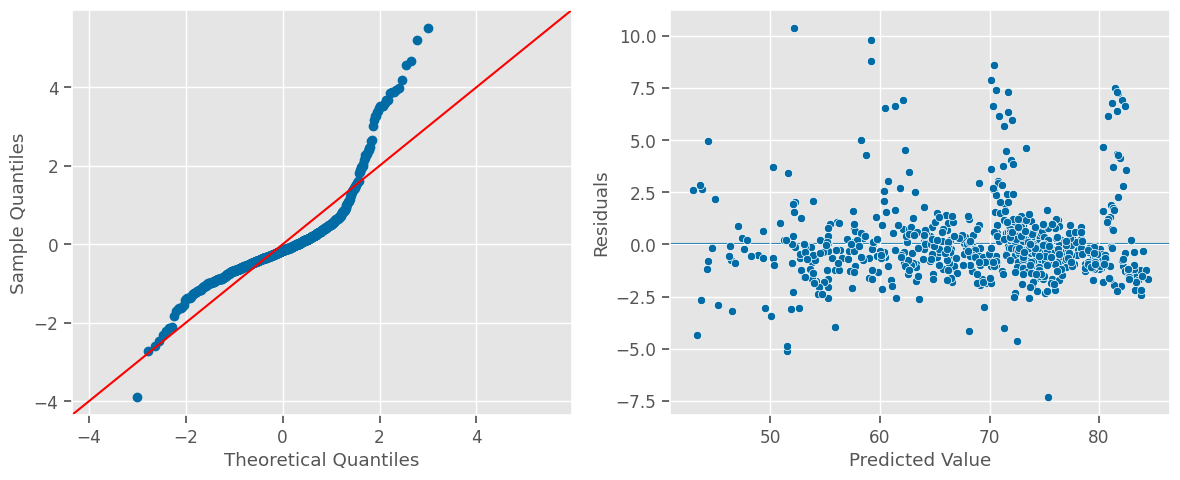

In [19]:
de.plot_residuals(lin_reg, X_test_df,y_test)

### Extracting and Visualizing Coefficients

#### Extracting Coefficients

In [20]:
## access the .coef_ 
# lin_reg.coef_

In [21]:
## Intercept
# lin_reg.intercept_

In [22]:
# ## Saving the coefficients
# coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
# coeffs.loc['intercept'] = lin_reg.intercept_
# coeffs

#### def `get_coefficients`

In [23]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [24]:
coeffs = get_coefficients(lin_reg)
coeffs

Year                        0.265644
Adult Mortality            -0.002424
infant deaths               0.109358
Alcohol                    -0.064367
percentage expenditure      0.000154
                             ...    
Country_Zambia             -9.018217
Country_Zimbabwe           -8.385612
Status_Developed            5.307128
Status_Developing          -5.307120
intercept                -461.245540
Length: 205, dtype: float64

In [25]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [26]:
coeffs.sort_values()

intercept                                                      -461.2455
Country_Sierra Leone                                            -19.3439
Country_Côte d'Ivoire                                           -15.4878
Country_Central African Republic                                -15.2399
Country_Angola                                                  -15.2160
Country_Chad                                                    -13.7055
Country_Somalia                                                 -12.4401
Country_Malawi                                                  -11.4993
Country_Lesotho                                                 -11.3403
Country_Guinea-Bissau                                           -10.5861
Country_South Sudan                                             -10.5449
Country_Burundi                                                 -10.4404
Country_Cameroon                                                -10.1861
Country_Guinea                                     

### Visualizing

#### **Q: How can we handle this many coefficients in our viz?**

- Some options include:
    - Only plot most the N most positive and N most negative.
    - Separate out OHE countries into a separate graph.
    
    
- Let's try the second option: separating the OHE countries.

In [27]:
## Get a list of all of the ohe columsn
country_feats = [c for c in X_train_df.columns if c.startswith('Country')]
len(country_feats)

183

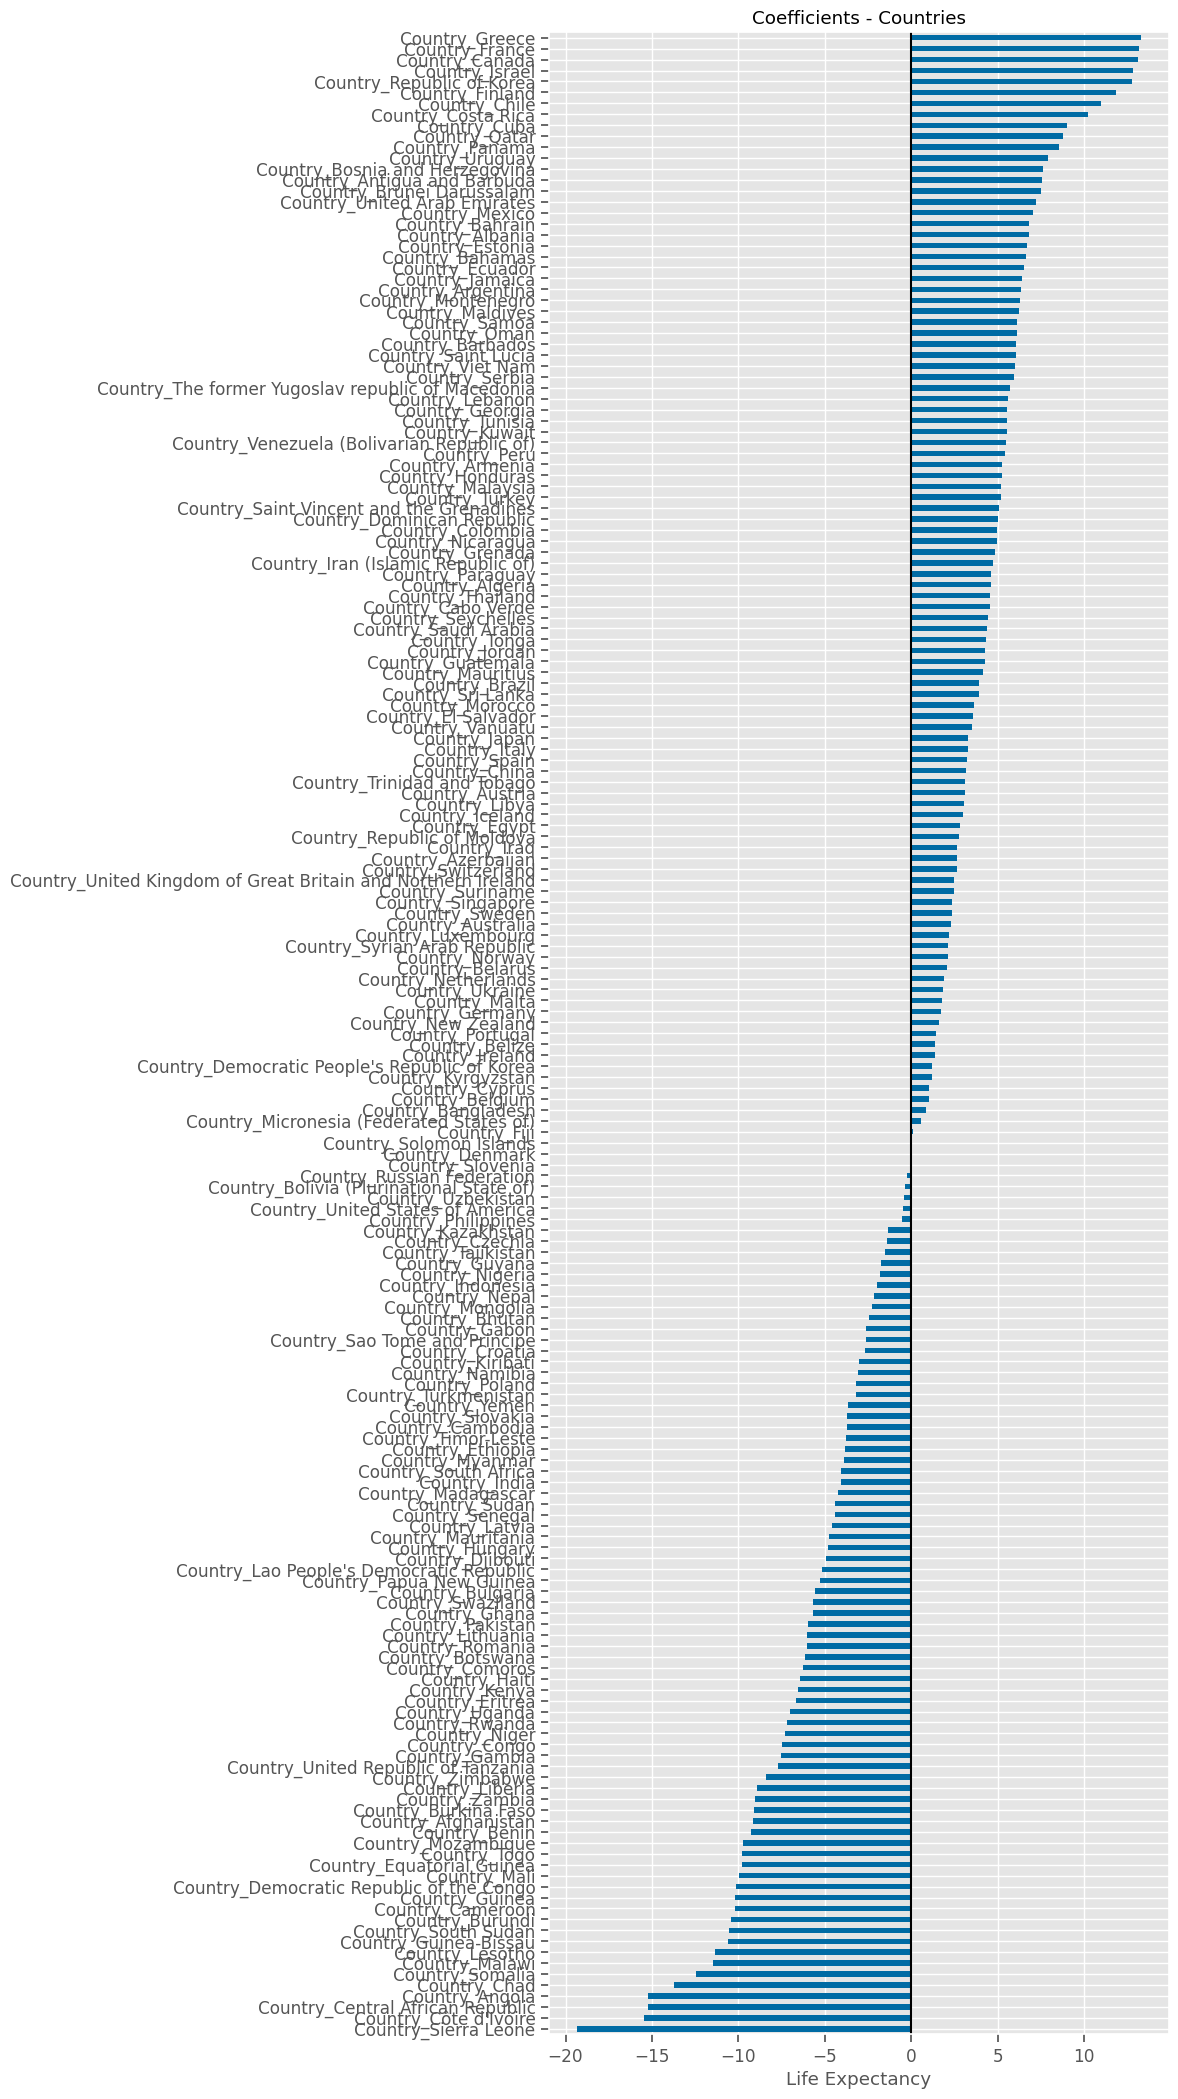

In [28]:
## Plot country ceoffs
ax = coeffs[country_feats].sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0, color='k')
ax.set(xlabel='Life Expectancy', title="Coefficients - Countries");

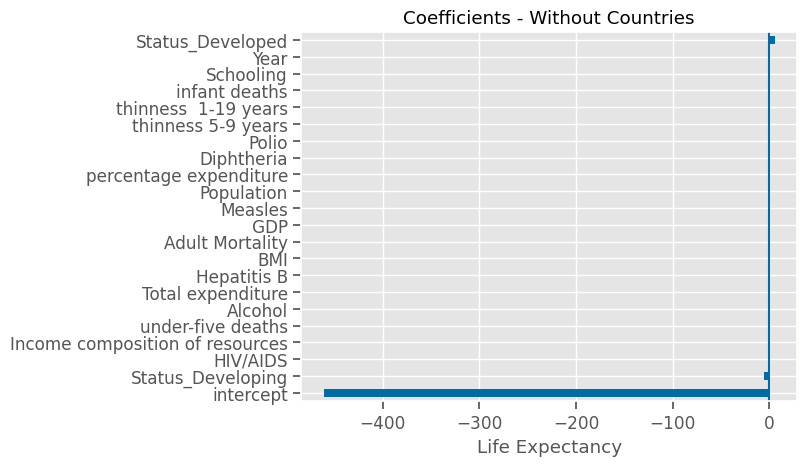

In [29]:
## Plot everything but countries
ax = coeffs.drop(country_feats).sort_values().plot(kind='barh')#, figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='Life Expectancy', title="Coefficients - Without Countries");

> ***Q: What do we notice about our non-country coefficients? Is there anything odd that would be difficult to a stakeholder?***

- The model's intercept is -450 years old

- What would we get if we didn't include an intercept?

## Model #2 - No Intercept

In [30]:
lin_reg_noint= LinearRegression(fit_intercept=False)
lin_reg_noint.fit(X_train_df,y_train)
evaluate_regression(lin_reg_noint, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.96,1.15,1.83
Test,0.96,1.19,1.88


> Notice the model's performance is the same

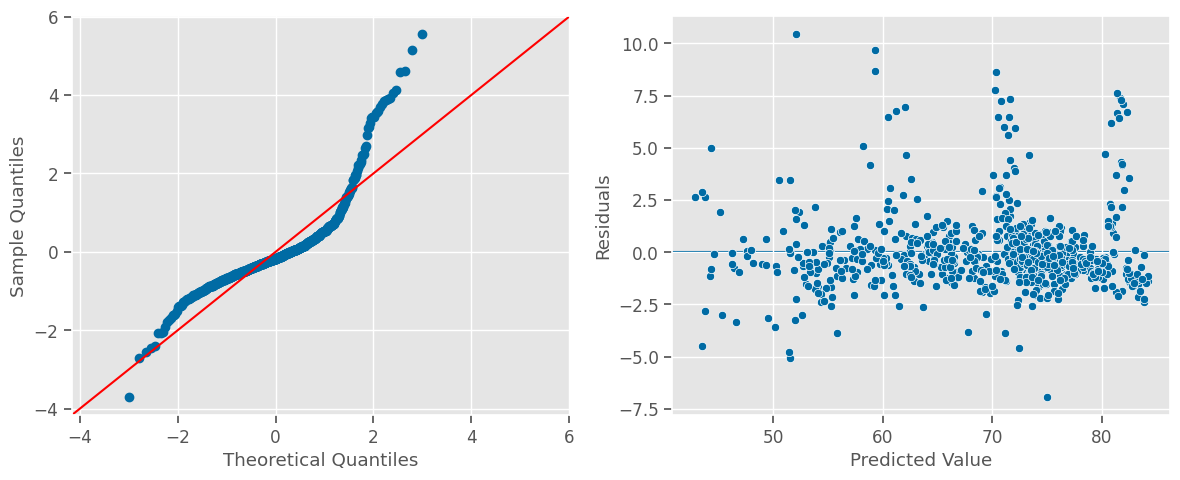

In [31]:
de.plot_residuals(lin_reg_noint, X_test_df,y_test)

In [32]:
coeffs_noint = get_coefficients(lin_reg_noint)
coeffs_noint

Year                                                                 0.2656
Adult Mortality                                                     -0.0024
infant deaths                                                        0.1092
Alcohol                                                             -0.0642
percentage expenditure                                               0.0002
Hepatitis B                                                         -0.0046
Measles                                                             -0.0000
BMI                                                                 -0.0024
under-five deaths                                                   -0.0825
Polio                                                                0.0059
Total expenditure                                                   -0.0256
Diphtheria                                                           0.0051
HIV/AIDS                                                            -0.3203
GDP         

> But coefficients have changed

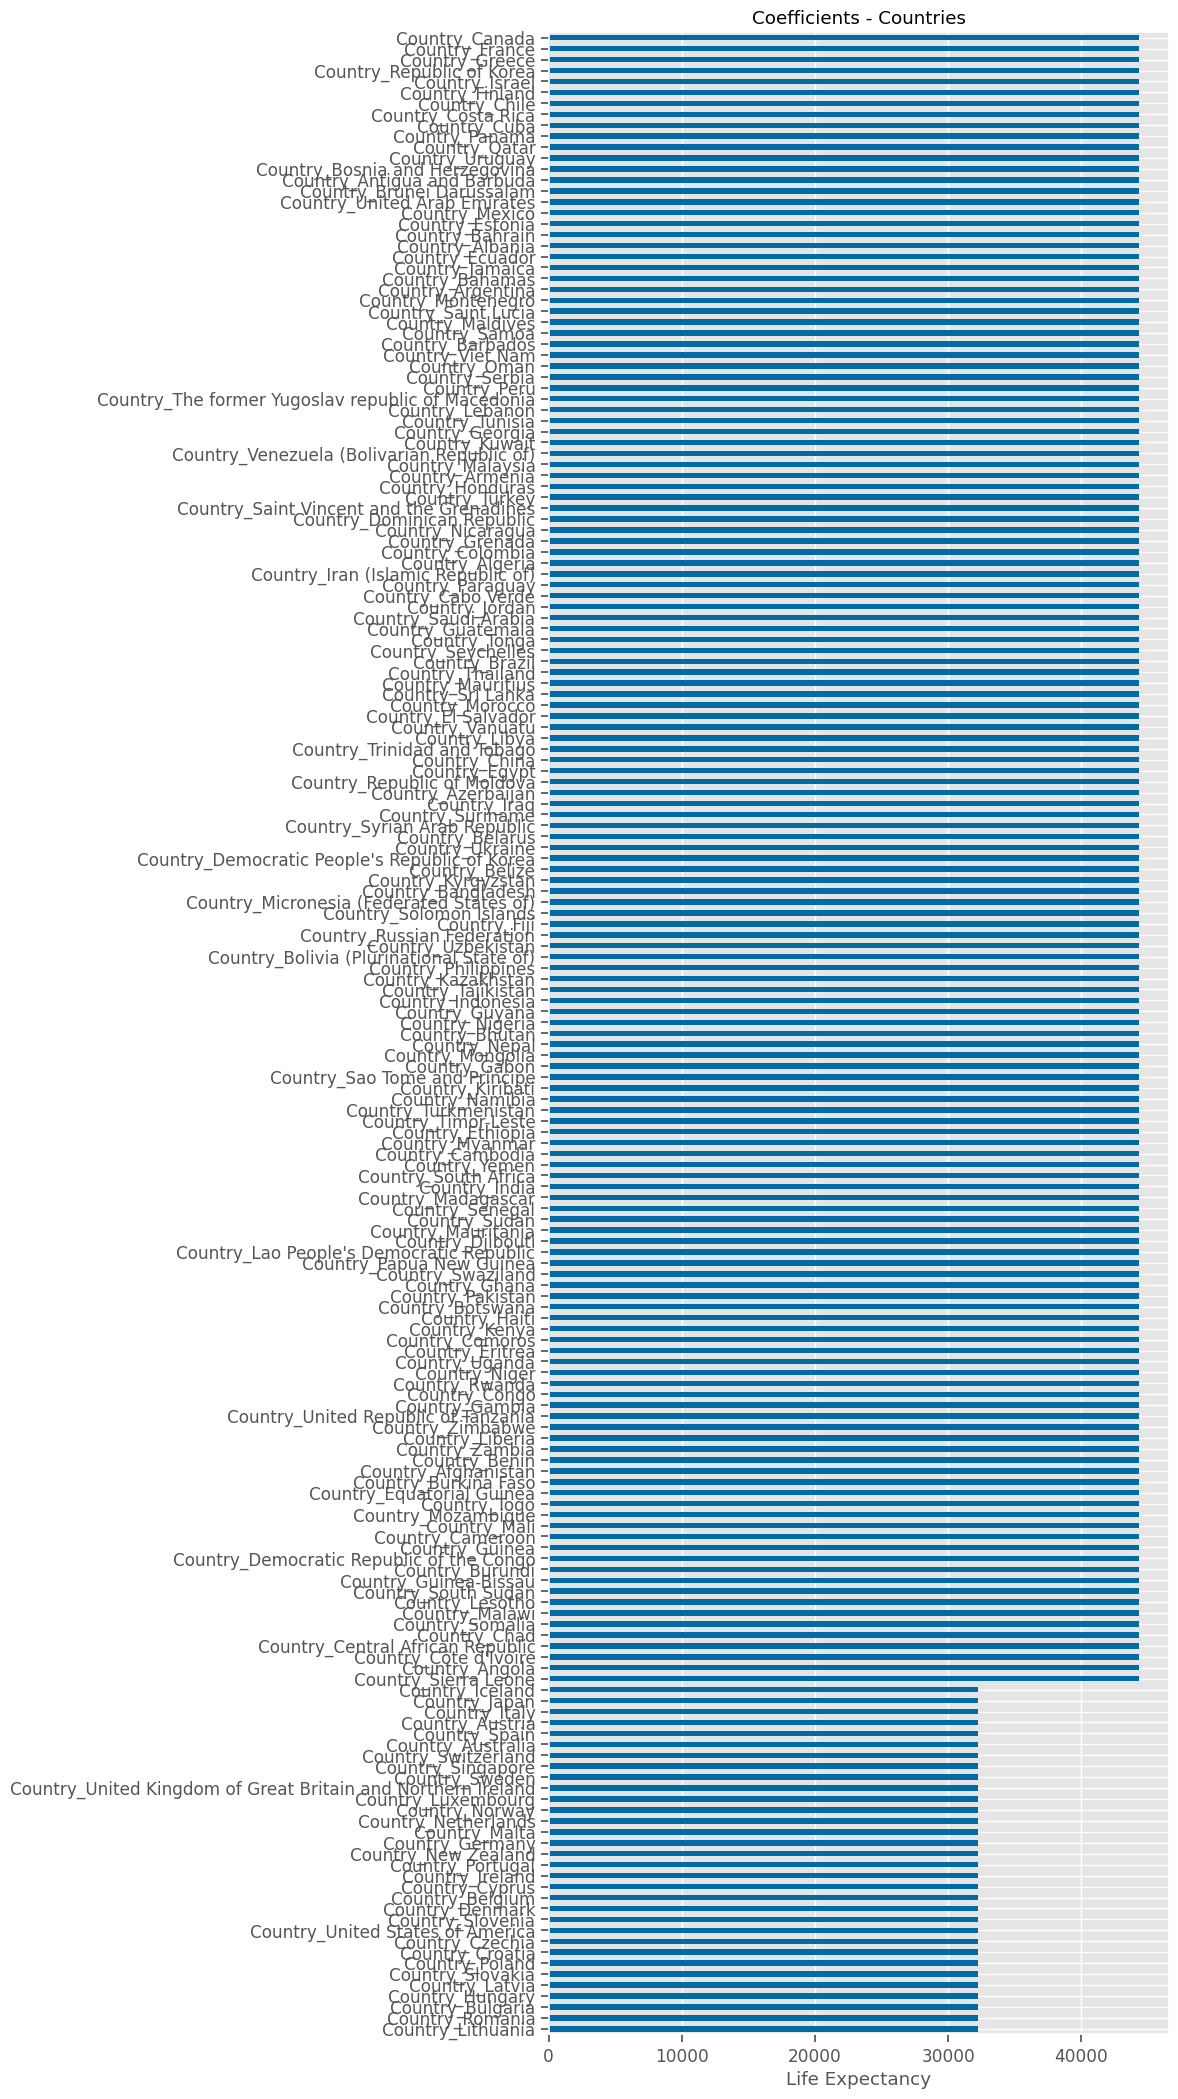

In [33]:
ax = coeffs_noint[country_feats].sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='Life Expectancy', title="Coefficients - Countries");

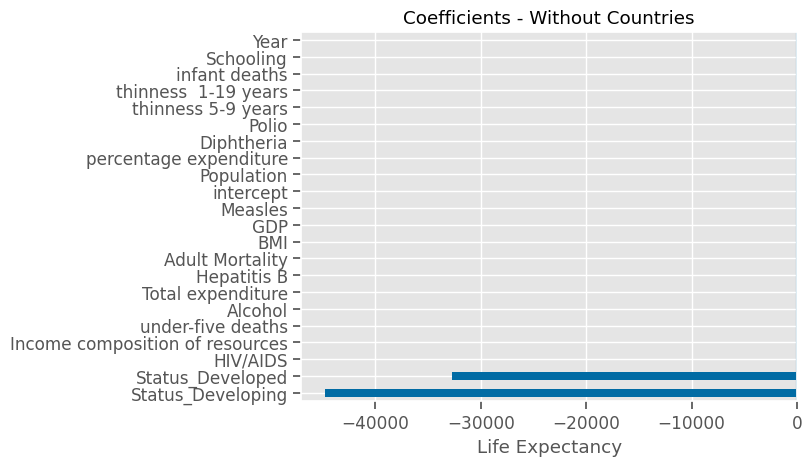

In [34]:
ax = coeffs_noint.drop(country_feats).sort_values().plot(kind='barh')#, figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='Life Expectancy', title="Coefficients - Without Countries");

## Model #3 - No Countries

In [35]:
# ### Train Test Split
## Make x and y variables
target = "Life expectancy"
drop_feats = ["Country"]

y = df[target].copy()
X = df.drop(columns=[target, *drop_feats]).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)

## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))


## Make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [36]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=feature_names,
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=feature_names,
                         index=X_test.index)


In [37]:
lin_reg= LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.82,3.00,4.02
Test,0.82,3.06,4.12


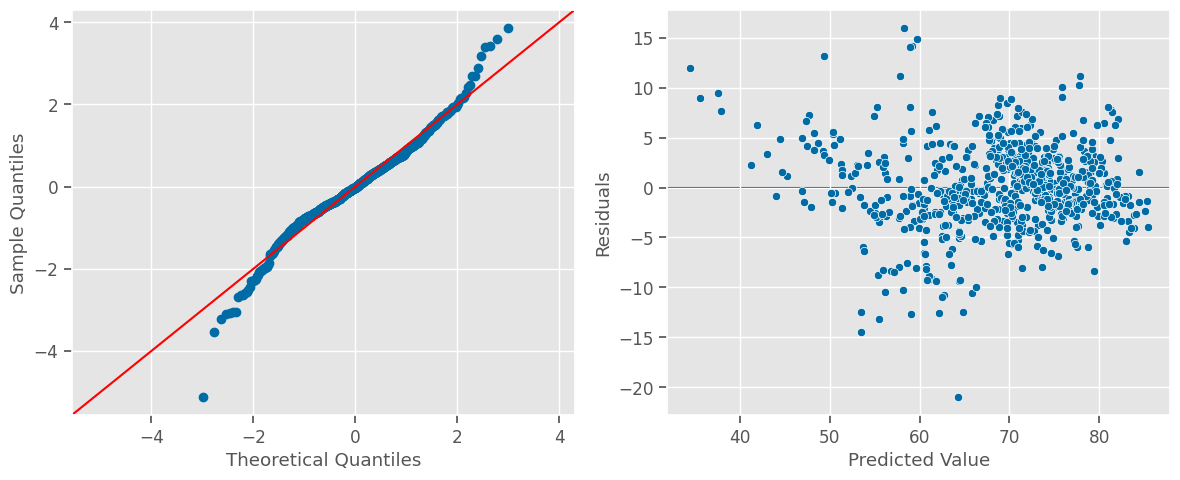

In [38]:
de.plot_residuals(lin_reg, X_test_df,y_test)

In [39]:
coeffs = get_coefficients(lin_reg)
coeffs

Year                              -0.0168
Adult Mortality                   -0.0193
infant deaths                      0.1070
Alcohol                            0.0556
percentage expenditure             0.0000
Hepatitis B                       -0.0096
Measles                           -0.0000
BMI                                0.0391
under-five deaths                 -0.0810
Polio                              0.0250
Total expenditure                  0.1062
Diphtheria                         0.0377
HIV/AIDS                          -0.4789
GDP                                0.0000
Population                         0.0000
thinness  1-19 years              -0.0498
thinness 5-9 years                -0.0265
Income composition of resources    5.7370
Schooling                          0.6857
Status_Developed                  89.6930
Status_Developing                 88.2086
intercept                          0.0000
dtype: float64

<AxesSubplot: >

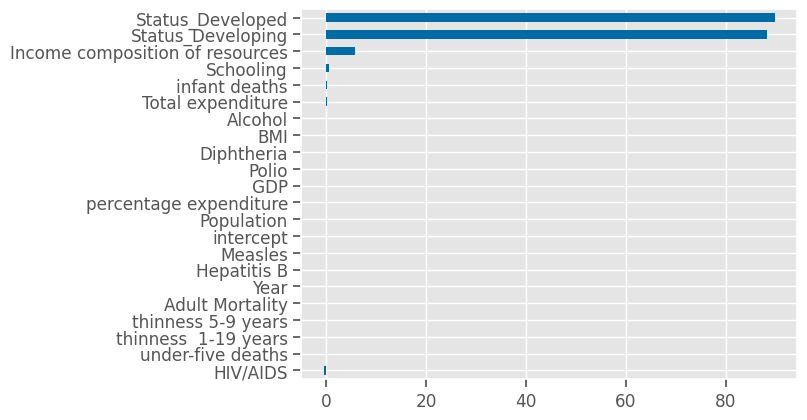

In [40]:
coeffs.sort_values().plot(kind='barh')

## Model 3: Dropping Categories with OneHotEncoder

####  OneHotEncoder's Drop Argument

In [41]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False,
                                      ))
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(drop='if_binary', sparse=False))])

In [42]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=feature_names,
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=feature_names,
                         index=X_test.index)
display(X_train_df.head())

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
2414,"2,010.0000",359.0000,27.0000,4.5801,0.0000,81.4389,0.0000,38.1130,41.0000,82.4908,5.9320,82.4519,4.0000,"1,562.2393","167,192.0000",4.8116,4.8195,0.0000,0.0000,1.0000
1576,"2,009.0000",491.0000,36.0000,1.1600,7.9151,93.0000,21.0000,17.3000,56.0000,93.0000,1.1800,93.0000,14.9000,42.7380,"1,471,462.0000",6.9000,6.8000,0.4150,9.9000,1.0000
2559,"2,009.0000",174.0000,10.0000,0.3000,35.7161,93.0000,0.0000,35.9000,12.0000,93.0000,5.9300,93.0000,0.2000,666.3459,"7,472,819.0000",3.7000,3.8000,0.6010,11.1000,1.0000
1524,"2,013.0000",178.0000,0.0000,15.0400,"1,968.8168",93.0000,35.0000,61.4000,0.0000,93.0000,6.5900,93.0000,0.1000,"15,712.8238","2,957,689.0000",2.7000,2.7000,0.8340,16.4000,0.0000
33,"2,014.0000",11.0000,21.0000,0.0100,54.2373,95.0000,0.0000,58.4000,24.0000,95.0000,7.2100,95.0000,0.1000,547.8517,"39,113,313.0000",6.0000,5.8000,0.7410,14.4000,1.0000


Split,R^2,MAE,RMSE
Train,0.82,3.01,4.03
Test,0.82,3.05,4.12


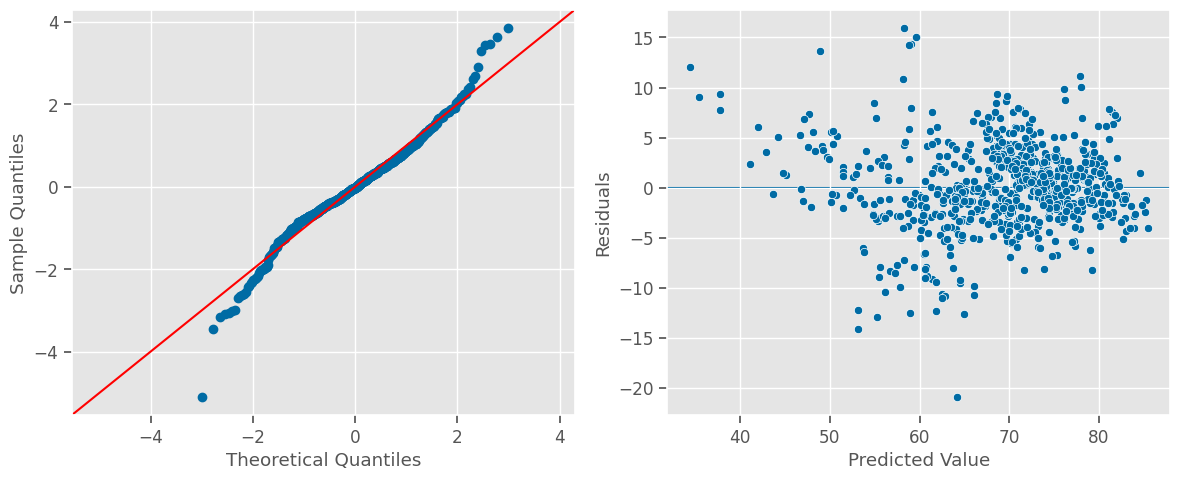

In [43]:
lin_reg_drop = LinearRegression(fit_intercept=False)
lin_reg_drop.fit(X_train_df,y_train)
evaluate_regression(lin_reg_drop, X_train_df, y_train, 
                    X_test_df, y_test)

de.plot_residuals(lin_reg_drop, X_test_df,y_test)

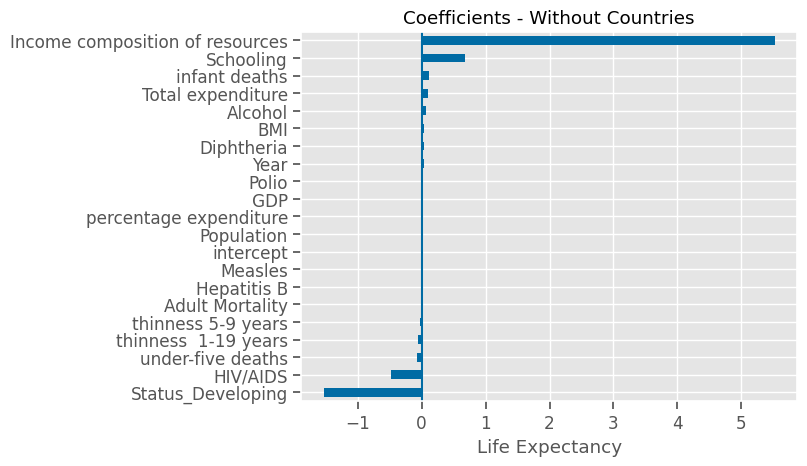

In [44]:
coeffs_dropped = get_coefficients(lin_reg_drop)


ax = coeffs_dropped.sort_values().plot(kind='barh')#, figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='Life Expectancy', title="Coefficients - Without Countries");

> ***Q: What are the most positive coefficients? What are the most negative?***

- Why does infant_deaths have a positive coefficient??

In [45]:
plot_df = pd.concat([X_train_df,y_train],axis=1)

<AxesSubplot: xlabel='infant deaths', ylabel='Life expectancy'>

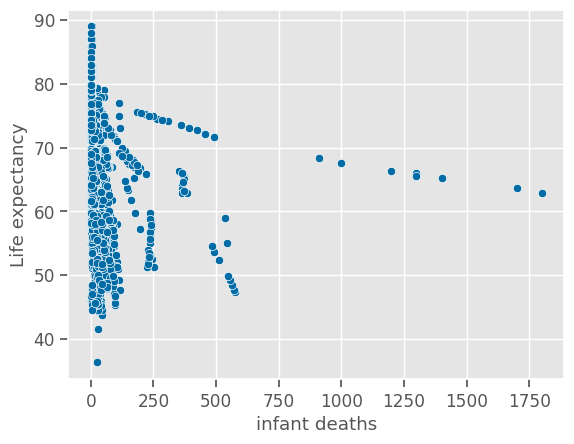

In [46]:
sns.scatterplot(data=plot_df, x='infant deaths', y=target)

<AxesSubplot: xlabel='infant deaths', ylabel='Life expectancy'>

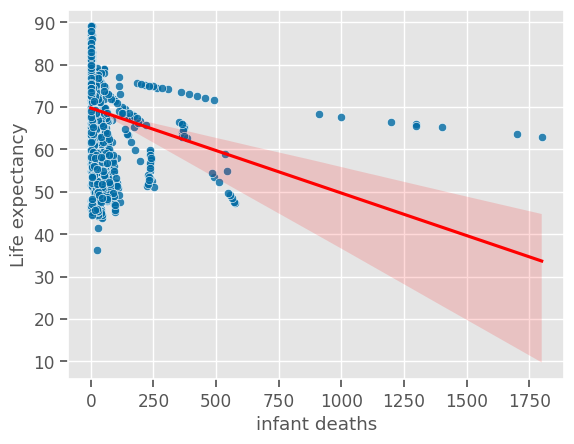

In [47]:
regplot_kws = dict(line_kws={'color':'red'},
                  scatter_kws={'ec':'white','lw':0.5})
sns.regplot(data=plot_df, x='infant deaths', y=target,**regplot_kws)
           

<AxesSubplot: xlabel='infant deaths', ylabel='Life expectancy'>

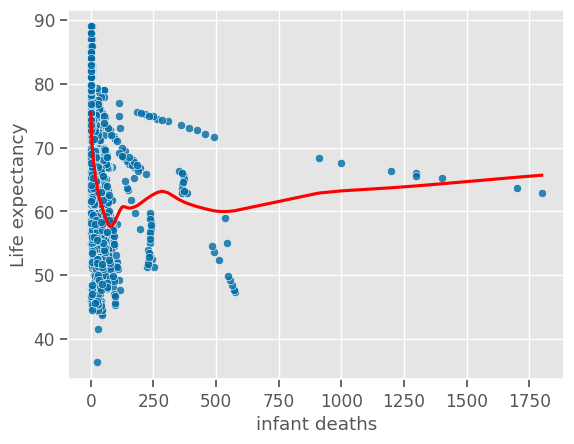

In [48]:
sns.regplot(data=plot_df, x='infant deaths', y=target,**regplot_kws,
           lowess=True)


> Feature is too complex for a simple linear regression. Let's try a random forest.

## Feature Importance

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_df,y_train)
evaluate_regression(rf_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.99,0.45,0.71
Test,0.97,1.11,1.75


> Using the models .feature_names_in_

In [51]:
## Saving the coefficients
importances = pd.Series(rf_reg.feature_importances_, index= rf_reg.feature_names_in_)
importances

Year                              0.0076
Adult Mortality                   0.1251
infant deaths                     0.0070
Alcohol                           0.0065
percentage expenditure            0.0035
Hepatitis B                       0.0024
Measles                           0.0028
BMI                               0.0114
under-five deaths                 0.0151
Polio                             0.0040
Total expenditure                 0.0060
Diphtheria                        0.0044
HIV/AIDS                          0.5991
GDP                               0.0042
Population                        0.0032
thinness  1-19 years              0.0059
thinness 5-9 years                0.0096
Income composition of resources   0.1636
Schooling                         0.0185
Status_Developing                 0.0001
dtype: float64

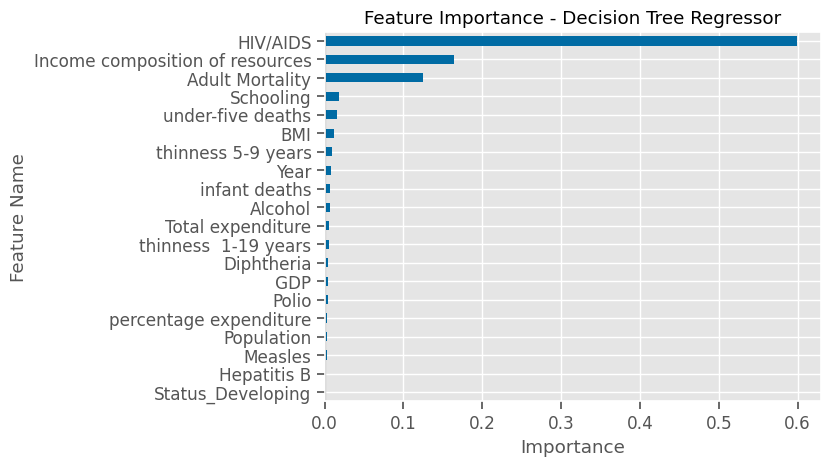

In [52]:
ax = importances.sort_values().tail(20).plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Decision Tree Regressor',ylabel="Feature Name",
      xlabel='Importance');


## Using joblib to Save our Model, Data, and Objects

In [53]:
X_train.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2414,2010,Developing,359.0000,27,NaN,0.0000,NaN,0,NaN,41,NaN,NaN,NaN,4.0000,"1,562.2393","167,192.0000",NaN,NaN,0.0000,0.0000
1576,2009,Developing,491.0000,36,1.1600,7.9151,93.0000,21,17.3000,56,93.0000,1.1800,93.0000,14.9000,42.7380,"1,471,462.0000",6.9000,6.8000,0.4150,9.9000
2559,2009,Developing,174.0000,10,0.3000,35.7161,93.0000,0,35.9000,12,93.0000,5.9300,93.0000,0.2000,666.3459,"7,472,819.0000",3.7000,3.8000,0.6010,11.1000
1524,2013,Developed,178.0000,0,15.0400,"1,968.8168",93.0000,35,61.4000,0,93.0000,6.5900,93.0000,0.1000,"15,712.8238","2,957,689.0000",2.7000,2.7000,0.8340,16.4000
33,2014,Developing,11.0000,21,0.0100,54.2373,95.0000,0,58.4000,24,95.0000,7.2100,95.0000,0.1000,547.8517,"39,113,313.0000",6.0000,5.8000,0.7410,14.4000


In [54]:
evaluate_regression(lin_reg,X_train_df,y_train, X_test_df, y_test)

C:\Users\tyler\anaconda3\envs\dojo-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Status_Developed

  warnings.warn(message, FutureWarning)


ValueError: X has 20 features, but LinearRegression is expecting 21 features as input.

In [ ]:
evaluate_regression(rf_reg,X_train_df,y_train, X_test_df, y_test)

In [ ]:
import joblib, os

## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train':y_train,
         'X_test':X_test,
         'y_test':y_test,
          'preprocessor':preprocessor,
         'LinearRegression': lin_reg,
          'RandomForestRegressor':rf_reg
         }

In [ ]:
folder = "../Models/"
os.makedirs(folder, exist_ok=True)

In [ ]:
fname = folder+'wk1-lect01-codealong.joblib'
joblib.dump(export, fname)

In [ ]:
loaded = joblib.load(fname)
loaded.keys()

> We will continue working with this task and these models next class!

# *Teaser* Shap (For Regression)

In [ ]:
# Import and init shap
import shap
shap.initjs()

In [ ]:
# Take a sample of the training data
X_shap = shap.sample(X_train_df,nsamples = 500,random_state=SEED)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(rf_reg)

## Get shap values form the explainer
shap_values = explainer(X_shap,y_shap)

In [ ]:
shap.summary_plot(shap_values, features = X_shap)